## DATA 558: Homework 4

Geoffrey Li

May 3, 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
import datetime
import pickle

## Exercise 2

(a) Generate a simulated data set with 30 observations in each of three classes (i.e. 90 observations total), and 60 features. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [2]:
X = \
    np.append(
        np.random.uniform(0, 50, size=(30, 60)), np.append(
            np.random.uniform(50, 100, size=(30, 60)), 
            np.random.uniform(100, 150, size=(30, 60)),
            axis=0
        ), axis=0
    )

In [3]:
X.shape

(90, 60)

In [4]:
Z = X - X.mean(axis=0)

(b) Write your own power iteration algorithm. Run it on the 90 observations to compute the first principal component. After performing the appropriate projection (see Lab #4), run it on the 90 observations now to compute the second principal component. Compare your results to the ones obtained with scikit-learn’s PCA algorithm. 

In [5]:
def prep_cov_mat(z):
    return 1/(z.shape[0]-1)*(z.T @ z)

In [6]:
def power_iter_algo(A, max_iter = 100):
    i = 0
    eigvec = np.random.uniform(0, 1, size=(A.shape[1], 1))
    
    while i < max_iter:
        z = A @ eigvec
        eigvec = z/np.sqrt(np.sum(z**2))
        eigval = eigvec.T @ A @ eigvec
        i += 1
    
    return eigval[0, 0], eigvec
    

In [7]:
def find_k_pc(A, k):
    eigval = list()
    eigvec = list()
    
    for i in range(k):
        eigval.append(None)
        eigvec.append(None)
        eigval[i], eigvec[i] = power_iter_algo(A)
        A = A - eigval[i]*(eigvec[i]@eigvec[i].T)
        print('Power Iteration '+str(i)+' Complete. '+str(datetime.datetime.now()))
    
    return eigval, eigvec

In [8]:
def proj_k_pc(x, pc_list, k):
    pc_matrix = np.concatenate(pc_list[0:k], axis=1)
    return x @ pc_matrix

In [9]:
Z_cov_mat = prep_cov_mat(Z)
pc_eigval, pc = find_k_pc(Z_cov_mat, 2)
Z_proj_2d = proj_k_pc(Z, pc, 2)

Power Iteration 0 Complete. 2019-05-05 17:56:17.405034
Power Iteration 1 Complete. 2019-05-05 17:56:17.409191


Plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then you’re done. If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes.

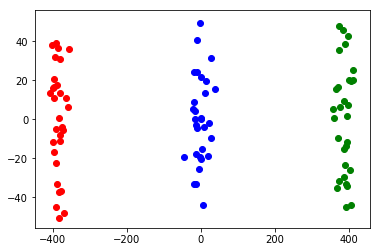

In [10]:
plt.scatter(Z_proj_2d[0:30, 0], Z_proj_2d[0:30, 1], color='red')
plt.scatter(Z_proj_2d[30:60, 0], Z_proj_2d[30:60, 1], color='blue')
plt.scatter(Z_proj_2d[60:90, 0], Z_proj_2d[60:90, 1], color='green')

### Trying with sklearn's PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Z)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

First Principal Component

In [12]:
pca.components_[0].round(4)

array([0.1234, 0.1241, 0.1315, 0.1245, 0.126 , 0.1348, 0.1315, 0.1285,
       0.1306, 0.1256, 0.1327, 0.1257, 0.1312, 0.131 , 0.124 , 0.1325,
       0.131 , 0.1307, 0.1289, 0.1259, 0.1345, 0.1282, 0.1369, 0.1294,
       0.1327, 0.1266, 0.1199, 0.1249, 0.1281, 0.1279, 0.1319, 0.128 ,
       0.129 , 0.1345, 0.1326, 0.1356, 0.1303, 0.126 , 0.126 , 0.1318,
       0.128 , 0.1274, 0.1252, 0.1218, 0.1348, 0.1314, 0.1316, 0.1219,
       0.1337, 0.1251, 0.1259, 0.1267, 0.1313, 0.1285, 0.1225, 0.1353,
       0.1295, 0.1299, 0.1287, 0.1345])

In [13]:
# Error between my implementation and sklearn.PCA
(pc[0][:,0] - pca.components_[0]).round(4)

array([-0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,
        0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,
        0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
        0.,  0., -0.,  0.,  0.,  0., -0., -0.])

Second Principal Component

In [14]:
pca.components_[1].round(4)

array([-0.0092, -0.0615,  0.276 , -0.1463, -0.1118, -0.0593,  0.1474,
       -0.027 ,  0.0188, -0.1206, -0.0469, -0.015 ,  0.0349, -0.0054,
       -0.0168,  0.0467, -0.0828, -0.0191,  0.0781, -0.086 , -0.1448,
        0.1338,  0.1499, -0.1377,  0.2435, -0.0016,  0.1713,  0.0654,
       -0.0946,  0.0164, -0.066 ,  0.1792,  0.0502, -0.0729, -0.1512,
       -0.0759, -0.1408,  0.0953,  0.0835, -0.0395, -0.1935, -0.3361,
        0.0626, -0.2295, -0.0747, -0.1873,  0.1443,  0.2125,  0.1244,
        0.0993,  0.0773, -0.0319, -0.0444,  0.0251, -0.0493,  0.2132,
        0.1542,  0.2411, -0.2062, -0.0683])

In [16]:
# Error between my implementation and sklearn.PCA
(pc[1][:,0] + pca.components_[1]).round(4)

array([ 0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,
       -0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,
       -0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0.,
       -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])

The principal components that I found using Power Iteration method seems to align closely with sklearn.

# Exercise 3

### Load in gradient descent algorithms.

In [17]:
def computegrad(x, y, beta, lamb):
    p = np.identity(len(x)) - np.diag(1/(1+np.exp(np.multiply(-y, x@beta))).reshape(1, -1)[0])
    return -1/len(x) * x.T @ p @ y + 2*lamb*beta


def computeobj(x, y, beta, lamb):
    return 1/len(x)*np.sum(np.log(1+np.exp(np.multiply(-y, x@beta)))) + lamb*np.sum(beta**2)


def backtracking(curr_beta, lamb, x, y, eta_t=1, alpha=0.5, gamma=0.5, max_iter=100):
    grad_curr_beta = computegrad(x, y, curr_beta, lamb)  # Gradient at current beta
    norm_grad_curr_beta = np.sqrt(np.sum(grad_curr_beta ** 2))  # Norm of the gradient at current beta
    found_eta_t = False
    i = 0  # Iteration counter

    while (found_eta_t is False and i < max_iter):
        if (computeobj(x, y, curr_beta - eta_t * grad_curr_beta, lamb) <
                computeobj(x, y, curr_beta, lamb) - alpha * eta_t * norm_grad_curr_beta ** 2):
            found_eta_t = True
        elif i == max_iter - 1:
            raise ('Maximum number of iterations of backtracking reached')
        else:
            eta_t *= gamma
            i += 1

    return eta_t


def initstepsize(x, lamb):
    return 1/(max(np.linalg.eigh(1/len(x)*x.T@x)[0]) + lamb)


def graddescent(beta_init, lamb, x, y, ss_init, targ_acc):
    beta_values = list()
    beta_values.append(beta_init)

    grad_beta = computegrad(x, y, beta_init, lamb)
    norm_grad_beta = np.sqrt(np.sum(grad_beta ** 2))
    tuned_step_size = ss_init

    t = 0

    while norm_grad_beta > targ_acc:
        tuned_step_size = backtracking(beta_values[t], lamb, x, y,
                                       eta_t=tuned_step_size, alpha=0.5, gamma=0.8, max_iter=100)
        beta_values.append(beta_values[t] - tuned_step_size * grad_beta)

        t += 1

        grad_beta = computegrad(x, y, beta_values[t], lamb)
        norm_grad_beta = np.sqrt(np.sum(grad_beta ** 2))

    return beta_values


def fastgradalgo(beta_init, lamb, x, y, theta_init, ss_init, targ_acc):
    beta_values = list()
    beta_values.append(beta_init)
    theta = theta_init

    grad_theta = computegrad(x, y, theta, lamb)

    grad_beta = computegrad(x, y, beta_init, lamb)
    norm_grad_beta = np.sqrt(np.sum(grad_beta ** 2))

    tuned_step_size = ss_init

    t = 0

    while norm_grad_beta > targ_acc:
        grad_theta = computegrad(x, y, theta, lamb)

        tuned_step_size = backtracking(beta_values[t], lamb, x, y,
                                       eta_t=tuned_step_size, alpha=0.5, gamma=0.8, max_iter=100)

        beta_values.append(theta - tuned_step_size * grad_theta)
        theta = beta_values[t + 1] + (t / (t + 3)) * (beta_values[t + 1] - beta_values[t])

        t += 1

        grad_beta = computegrad(x, y, beta_values[t], lamb)
        norm_grad_beta = np.sqrt(np.sum(grad_beta ** 2))

    return beta_values


def misclassificationerror(y, x, b):
    pred = np.fromiter(map(lambda p: 1 if p >= 0.5 else -1, 1/(1+np.exp(-x@b))), dtype=int)
    pred = np.fromiter(map(lambda c: pos_class if c == 1 else neg_class, pred), dtype=int)
    return 1 - np.mean(pred == y)


def find_opt_lambda(x, y):
    lr_cv = LogisticRegressionCV(penalty='l2',
                                 fit_intercept=False,
                                 tol=10e-8,
                                 max_iter=1000,
                                 cv=5)
    lr_cv.fit(x, y)
    return lr_cv.C_[0] 

### Load and process data. Choose 2 classes and relabel response variables.

In [20]:
path = '/Users/geoffreyli/geoffli @ UW/19-2-Sp-DATA-558/Homeworks/hw3/q4/'

In [21]:
X_train = np.load(path+'train_features.npy')
y_train = np.load(path+'train_labels.npy')

X_val = np.load(path+'val_features.npy')
y_val = np.load(path+'val_labels.npy')

X_test = np.load(path+'test_features.npy')

In [22]:
# Standardize the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [23]:
# Subsetting data to just 2 classes: 1 (+1) and 0 (-1).
pos_class = 1
neg_class = 0

train_subset = (y_train == pos_class) | (y_train == neg_class)
val_subset = (y_val == pos_class) | (y_val == neg_class)

y_train_subset = y_train[np.where(train_subset)]
X_train_subset = X_train[train_subset.nonzero()[0]]

y_val_subset = y_val[np.where(val_subset)]
X_val_subset = X_val[val_subset.nonzero()[0]]

In [24]:
y_train_subset = np.fromiter(map(lambda n: 1 if n == pos_class else -1, y_train_subset), dtype=int).reshape(-1, 1)
y_val_subset = np.fromiter(map(lambda n: 1 if n == pos_class else -1, y_val_subset), dtype=int).reshape(-1, 1)

In [25]:
cov_mat_X_train = prep_cov_mat(X_train_subset)

### Find Principal Components using sklearn.PCA 

In [26]:
dims = [2**i for i in range(1,10)]

In [27]:
from sklearn.decomposition import PCA

pca_comp = PCA(n_components=max(dims))
pca_comp.fit(cov_mat_X_train)
pc = pca_comp.components_.T

### Define function to run iteratively based on desired dimensionality reduction.

In [28]:
def PCA_classifier(y, x, y_subset, x_subset, x_test, pc_list, k):
    print('Starting k =', k, 'projection...')
    print(datetime.datetime.now())
    
    # Project X onto input # of dimensions using PCA principal components
    x_train_subset_proj = x_subset @ pc_list[:, 0:k]
    x_train_proj = x @ pc_list[:, 0:k]
    x_test_proj = x_test @ pc_list[:, 0:k]
    print('Projection complete.')
    print(datetime.datetime.now())
    
    # Find optimal lambda
    ol = find_opt_lambda(x_train_subset_proj, y_subset)
    print('Found optimal lambda =', ol)
    print(datetime.datetime.now())
    
    # Initialize fast gradient
    init_beta = np.zeros(x_train_subset_proj.shape[1])[:, np.newaxis]
    init_theta = np.zeros(x_train_subset_proj.shape[1])[:, np.newaxis]
    init_eta = initstepsize(x_train_subset_proj, ol)
    target_accuracy = 10**-4

    # Run fast gradient and train classifier
    comp_beta_opt = fastgradalgo(init_beta, ol, x_train_subset_proj, y_subset, init_theta, init_eta, target_accuracy)
    comp_beta_opt_T = comp_beta_opt[len(comp_beta_opt)-1]
    
    # Make predictions for Kaggle test set
    y_preds = np.fromiter(map(lambda p: 1 if p >= 0.5 else -1, 1/(1+np.exp(-x_test_proj@comp_beta_opt_T))), 
                          dtype=np.int)
    y_preds = np.fromiter(map(lambda y: pos_class if y == 1 else neg_class, y_preds), dtype=int)
    print(pd.DataFrame({'preds':y_preds}).groupby('preds').size())
    pd.DataFrame({'Category':y_preds}).reset_index()\
        .rename(columns={'index':'Id'}).to_csv('./y-preds_'+str(k)+'.csv', index=False)
    
    # Return misclassification error using original train datasets (not subset)
    error = misclassificationerror(y, x_train_proj, comp_beta_opt_T)
    print('k =', k, 'iteration complete. Error =', error)
    print(datetime.datetime.now())
    print('')
    
    return error

In [29]:
misclasserror_by_dim_train = list(
    map(lambda k: PCA_classifier(
        y_train, X_train, y_train_subset, X_train_subset, X_test, pc, k), dims))

Starting k = 2 projection...
2019-05-05 17:59:25.029966
Projection complete.
2019-05-05 17:59:25.048584
Found optimal lambda = 0.046415888336127774
2019-05-05 17:59:25.121654


/anaconda3/envs/data558/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


preds
0    372
1    628
dtype: int64
k = 2 iteration complete. Error = 0.8356
2019-05-05 17:59:27.629805

Starting k = 4 projection...
2019-05-05 17:59:27.630088
Projection complete.
2019-05-05 17:59:27.646851
Found optimal lambda = 0.000774263682681127
2019-05-05 17:59:27.745242


/anaconda3/envs/data558/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


preds
0    425
1    575
dtype: int64
k = 4 iteration complete. Error = 0.8180000000000001
2019-05-05 17:59:32.492864

Starting k = 8 projection...
2019-05-05 17:59:32.493081
Projection complete.
2019-05-05 17:59:32.508147
Found optimal lambda = 0.000774263682681127
2019-05-05 17:59:32.594912


/anaconda3/envs/data558/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


preds
0    443
1    557
dtype: int64
k = 8 iteration complete. Error = 0.8148
2019-05-05 17:59:44.179226

Starting k = 16 projection...
2019-05-05 17:59:44.183378
Projection complete.
2019-05-05 17:59:44.205629


/anaconda3/envs/data558/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Found optimal lambda = 0.046415888336127774
2019-05-05 17:59:44.642659
preds
0    440
1    560
dtype: int64
k = 16 iteration complete. Error = 0.8109999999999999
2019-05-05 18:00:07.291800

Starting k = 32 projection...
2019-05-05 18:00:07.293399
Projection complete.
2019-05-05 18:00:07.329011


/anaconda3/envs/data558/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Found optimal lambda = 0.005994842503189409
2019-05-05 18:00:07.685162
preds
0    456
1    544
dtype: int64
k = 32 iteration complete. Error = 0.8108
2019-05-05 18:00:34.542384

Starting k = 64 projection...
2019-05-05 18:00:34.543142
Projection complete.
2019-05-05 18:00:34.596158


/anaconda3/envs/data558/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Found optimal lambda = 0.005994842503189409
2019-05-05 18:00:34.984020
preds
0    418
1    582
dtype: int64
k = 64 iteration complete. Error = 0.8072
2019-05-05 18:01:29.209150

Starting k = 128 projection...
2019-05-05 18:01:29.213390
Projection complete.
2019-05-05 18:01:29.294551


/anaconda3/envs/data558/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Found optimal lambda = 0.000774263682681127
2019-05-05 18:01:30.366970
preds
0    441
1    559
dtype: int64
k = 128 iteration complete. Error = 0.8006
2019-05-05 18:03:23.526889

Starting k = 256 projection...
2019-05-05 18:03:23.531490
Projection complete.
2019-05-05 18:03:23.652631


/anaconda3/envs/data558/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Found optimal lambda = 0.005994842503189409
2019-05-05 18:03:24.333348
preds
0    440
1    560
dtype: int64
k = 256 iteration complete. Error = 0.8002
2019-05-05 18:05:28.687736

Starting k = 512 projection...
2019-05-05 18:05:28.690431
Projection complete.
2019-05-05 18:05:28.887600


/anaconda3/envs/data558/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Found optimal lambda = 0.005994842503189409
2019-05-05 18:05:29.884091
preds
0    440
1    560
dtype: int64
k = 512 iteration complete. Error = 0.8
2019-05-05 18:08:47.583737



In [34]:
# From kaggle submissions
dims_test = [2, 8, 16, 128, 256, 512]
misclasserror_by_dim_test = [1-0.18333, 1-0.21000, 1-0.21000, 1-0.21333, 1-0.21666, 1-0.21666]

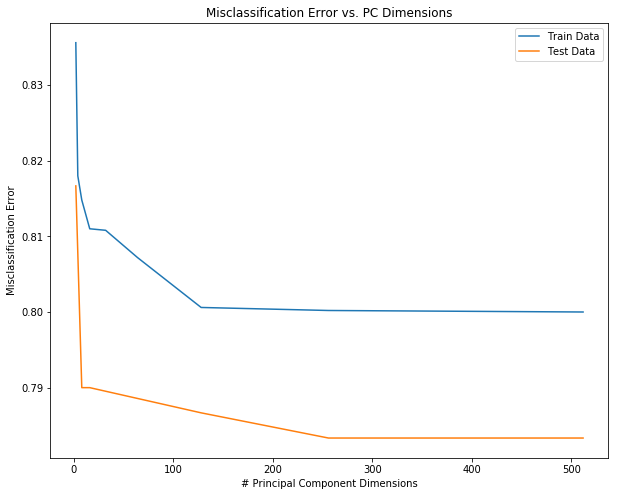

In [39]:
plt.figure(figsize=(10,8))
plt.plot(dims, misclasserror_by_dim_train)
plt.plot(dims_test, misclasserror_by_dim_test)
plt.title('Misclassification Error vs. PC Dimensions')
plt.xlabel('# Principal Component Dimensions')
plt.ylabel('Misclassification Error')
plt.legend(['Train Data', 'Test Data'], loc='upper right');

Here, we see the misclassification error rate (training data) approach 0.8 as the number of principal components increases. This makes sense as the reconstruction error is lowered as we use more principal components. 0.8 is the desired misclassification rate because we only picked 2 classes out of 10 to train our classifier on. The Kaggle test set submissions show slightly lower misclassification rates since they only test initially on 30% of the submission, so the classes are imbalanced.